In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("data/iris.csv",index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.decomposition import PCA
import seaborn as sns

In [5]:
pca = PCA(n_components=2) # whiten penamaan untuk scaling


In [6]:
X = df.drop(columns='Species')

In [7]:
X.shape

(150, 4)

In [8]:
X_pca=pca.fit_transform(X)

In [9]:
X_pca.shape

(150, 2)

In [14]:
y=df.Species


(-3.5813897122259695,
 4.150876127160958,
 -1.4021415241096402,
 1.510173606223833)

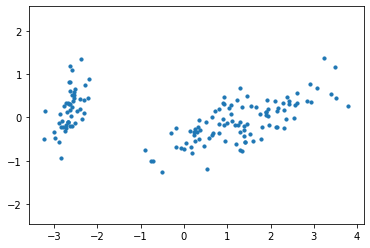

In [10]:
plt.scatter(X_pca[: ,0], X_pca[: ,1], s=10)
plt.axis("equal")

Text(0, 0.5, 'inertia')

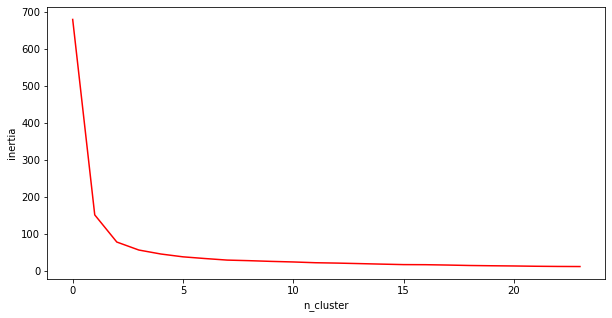

In [11]:
score=[]
for i in range(1,25):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit_predict(X)
    score.append(kmeans.inertia_)

plt.figure(figsize=[10,5])
plt.plot(score, "r-")
plt.xlabel("n_cluster")
plt.ylabel("inertia")

In [12]:
kmeans = KMeans(n_clusters=3)

In [13]:
cluster =kmeans.fit_predict(X)
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

<function ndarray.view>

In [28]:
cluster_pca=pca.fit_transform(np.array(cluster).reshape(-1,2))

In [14]:
centroid =kmeans.cluster_centers_
centroid

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [31]:
plt.scatter(X[cluster == 0, 0], X[cluster == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[cluster == 1, 0], X[cluster == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[cluster == 2, 0], X[cluster == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

TypeError: '(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False]), 0)' is an invalid key

(-3.734013178731073,
 7.397528128382063,
 -1.5042301759661854,
 3.6860303782335877)

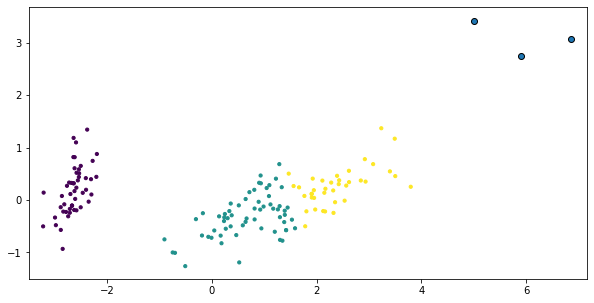

In [32]:
plt.figure(figsize=[10,5])
plt.scatter(X_pca[: ,0], X_pca[: ,1],c= cluster, s=10)
plt.scatter(centroid[ : ,0],centroid[ : ,1],edgecolors="k")
plt.axis("equal")